<a href="https://colab.research.google.com/github/PratikNagdeve/genai-lab-assignments/blob/main/Gen_AI_Lab3_30_1_2026_8_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3) GMM Clustering of 2D data.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse


In [ ]:

np.random.seed(42)


X, y_true = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=1.0,
    n_features=2
)

print("Shape of data:", X.shape)


Shape of data: (300, 2)


In [ ]:

gmm = GaussianMixture(
    n_components=3,
    covariance_type='full',
    random_state=42
)


gmm.fit(X)


labels = gmm.predict(X)


In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax, **kwargs):

    if covariance.shape == (2, 2):
        U, s, _ = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    ellipse = Ellipse(
        xy=position,
        width=width,
        height=height,
        angle=angle,
        **kwargs
    )
    ax.add_patch(ellipse)


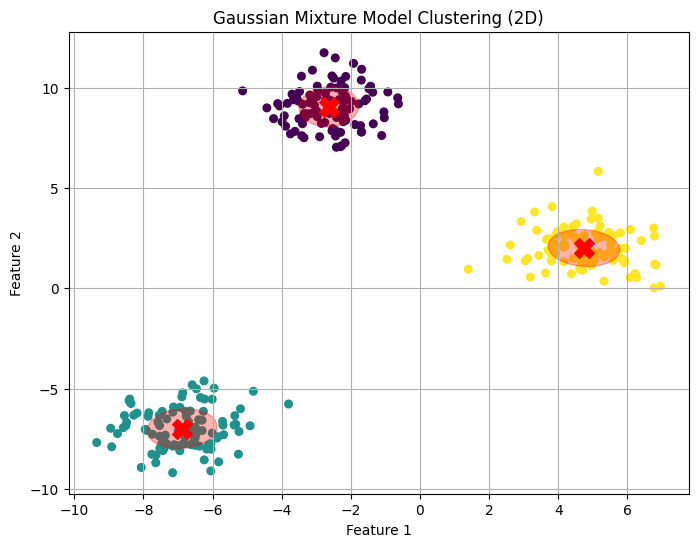

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)

ax = plt.gca()

for mean, cov in zip(gmm.means_, gmm.covariances_):
    plt.scatter(mean[0], mean[1], c='red', s=200, marker='X')
    draw_ellipse(mean, cov, ax, alpha=0.3, color='red')

plt.title("Gaussian Mixture Model Clustering (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


In [ ]:
print("Converged Means of Gaussian Components:\n")
print(gmm.means_)

print("\nCovariance Matrices of Gaussian Components:\n")
for i, cov in enumerate(gmm.covariances_):
    print(f"Component {i+1} Covariance Matrix:")
    print(cov)
    print()


Converged Means of Gaussian Components:

[[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]

Covariance Matrices of Gaussian Components:

Component 1 Covariance Matrix:
[[0.74869031 0.04368399]
 [0.04368399 0.98715159]]

Component 2 Covariance Matrix:
[[1.02961821 0.09574043]
 [0.09574043 0.98277206]]

Component 3 Covariance Matrix:
[[ 1.07033552 -0.09844297]
 [-0.09844297  0.85003382]]

